In [115]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.metrics import mean_absolute_error
import numpy as np

In [103]:
base_dir  = '../data/tracks/'
track_dirs = [base_dir + f for f in os.listdir(base_dir)]
print('n track dirs', len(track_dirs))

In [102]:
def show_popularity(track_dir):
    with open(track_dir + '/track_data.json') as f:
        data = json.load(f)
    print(data['popularity'])

def show_img(track_dir):
    img = track_dir + '/album_image.jpg'

    img = mpimg.imread(img)
    plt.imshow(img)
    plt.axis('off')  # To turn off axis values
    plt.show()

In [65]:
idx = 9

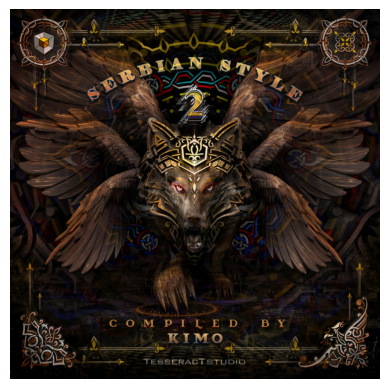

In [70]:
show_img(track_dirs[track_n[idx]])

In [113]:
track_n = [85, 13, 8, 1211, 283, 724, 222, 1121, 474, 29]
pred = [71, 62, 55,  0, 44, 34, 0, 10,  0, 27]
true = [47, 18,  0, 37, 27,  0, 0, 81, 34, 3]

In [72]:
show_popularity(track_dirs[track_n[idx]])

3


In [132]:
mean_absolute_error(np.array(true) / 100, np.array(pred) / 100)

0.34

In [130]:
mean_rand = 0
for i in range(100):
    random_guesses = []

    for i in range(10):
        random_guesses.append(random.randint(0, 100))
    
    mean_rand += mean_absolute_error(np.array(true) / 100, np.array(random_guesses) / 100)

mean_rand / 100

0.37162

In [155]:
def track_data(track_dir):
    with open(track_dir + '/track_data.json') as f:
        data = json.load(f)
    return data

def show_examples(track_dirs, n, min_pop=0, max_pop=100):
    filtered = []

    for d in track_dirs:
        pop = track_data(d)['popularity']
        if pop >= min_pop and pop <= max_pop:
            filtered.append(d)
    
    wanted = random.sample(filtered, n)
    image_files = [f + '/album_image.jpg' for f in wanted]
    popularity = [track_data(f)['popularity'] for f in wanted]

    rows = round(n/4)
    fig, axes = plt.subplots(rows, 4, figsize=(10, rows / 4 * 10))
    
    # Iterate over the image files and display them on the grid
    for ax, img_file, pop in zip(axes.ravel(), image_files, popularity):
        image = mpimg.imread(img_file)
        ax.imshow(image)
        ax.axis('off')  # Turn off the axis numbers
        # Display popularity on the image
        ax.text(0.5, 0.5, str(pop), transform=ax.transAxes,
                fontsize=10, color='white', ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", ec="none", fc="black", alpha=0.6))
    
    plt.tight_layout()
    plt.show()



In [ ]:
# at min pop of 70+ number of non-humanoid = 43
# = 100 when looking purely at the zero popularity

In [157]:
# show_examples(track_dirs, 128, 0, 0)

In [148]:
def show_distributions(track_dirs):
    artist_counts = []
    durations = []
    popularity_scores = []
    
    # Extract data from each directory
    for track_dir in track_dirs:
        data = track_data(track_dir)
        artist_counts.append(len(data['album']['artists']))
        durations.append(data["duration_ms"])
        popularity_scores.append(data["popularity"])
    
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))
    
    # Distribution of count of artists
    ax[0].hist(artist_counts, bins=range(1, max(artist_counts) + 2), align='left')
    ax[0].set_title("Distribution of Number of Artists in Albums")
    ax[0].set_xlabel("Number of Artists")
    ax[0].set_ylabel("Count")
    
    # Distribution of track durations
    ax[1].hist([d / 1000 / 60 for d in durations], bins=50, color='skyblue')
    ax[1].set_title("Distribution of Track Durations (mins)")
    ax[1].set_xlabel("Duration (mins)")
    ax[1].set_ylabel("Count")
    
    # Distribution of popularity scores
    ax[2].hist(popularity_scores, bins=100, color='salmon')
    ax[2].set_title("Distribution of Popularity Scores")
    ax[2].set_xlabel("Popularity Score")
    ax[2].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()


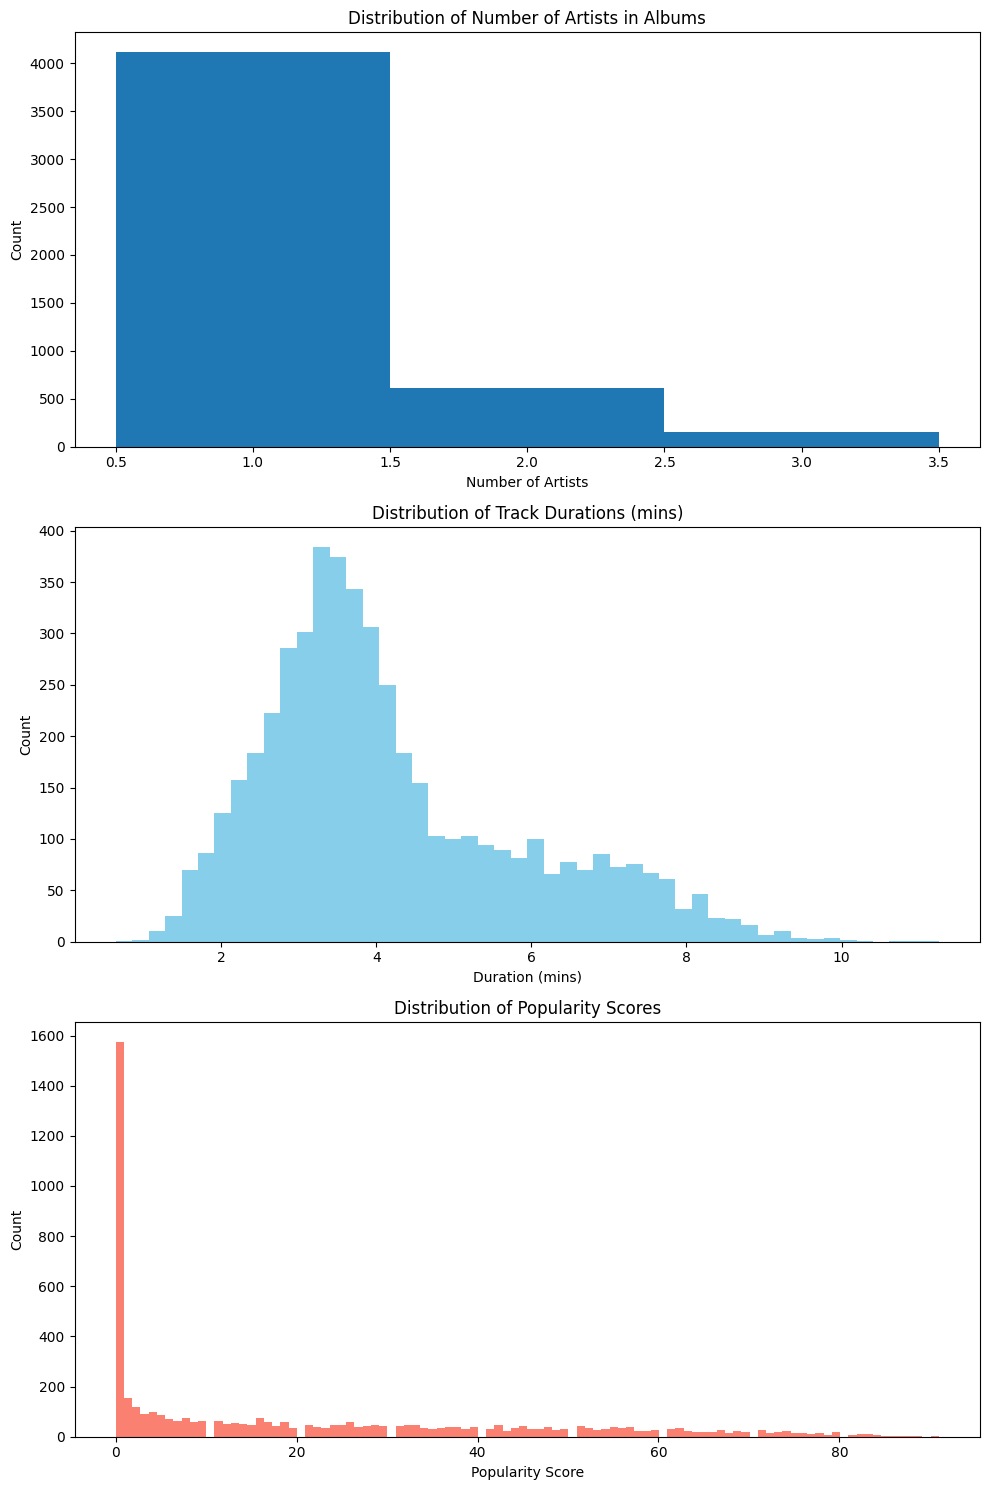

In [149]:
show_distributions(track_dirs)

In [168]:
pops = []
for t in track_dirs:
    pops.append(track_data(t)['popularity'])

sorted(pops)

print(np.mean(pops))
print(np.median(pops))

20.42076167076167
10.0
